In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load DataFrame from pickle file
df12_22 = pd.read_pickle('full_clean_df.pkl')

<Figure size 1000x600 with 0 Axes>

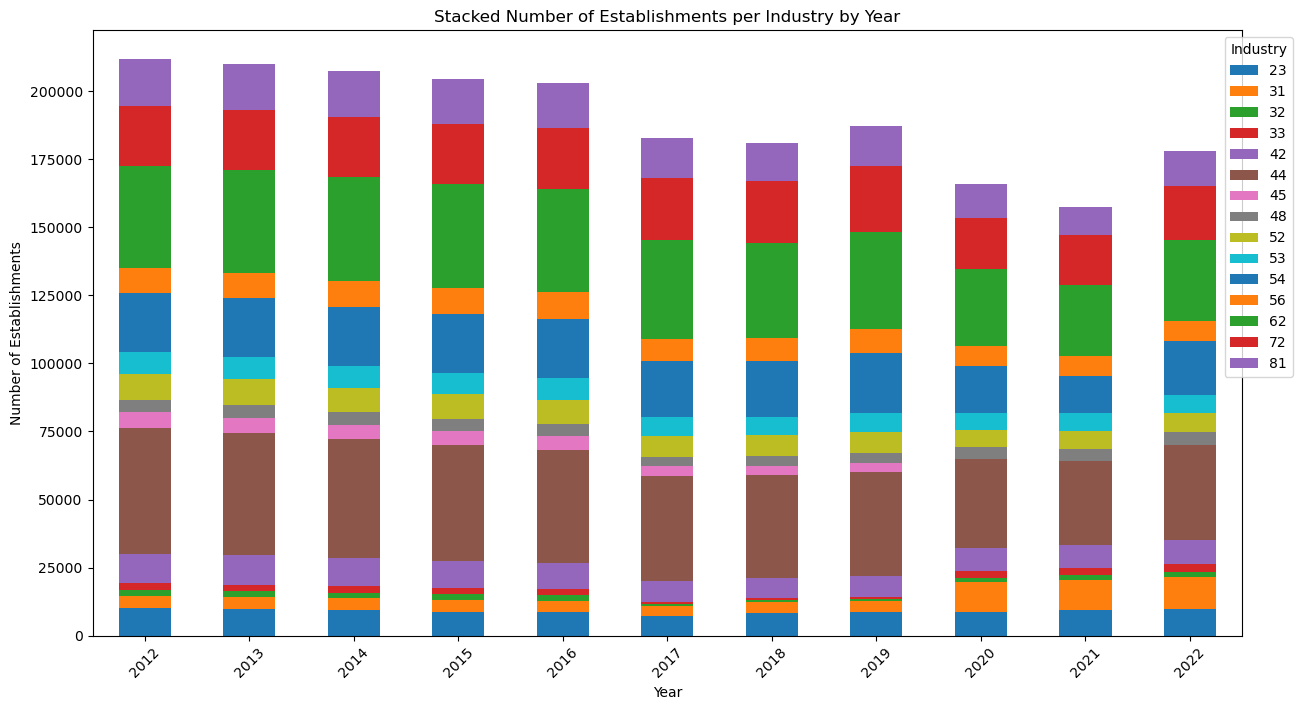

In [2]:
#creating a stacked bar chart to represent number of establishments per industry per year

#made a pivot table
pivot_df = df12_22.pivot_table(index='year', columns='naics', values='establishments', aggfunc = "sum")

# Plotting directly from the pivot_table DataFrame
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True)  # The index of pivot_df (Year) is used for the x-axis

plt.title('Stacked Number of Establishments per Industry by Year')
plt.xlabel('Year')  # This is technically redundant if 'Year' is clearly labeled from the DataFrame's index
plt.ylabel('Number of Establishments')
plt.legend(title='Industry')
plt.xticks(rotation=45)  # Improve label readability

plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper right')
plt.tight_layout(rect=[0, 0, 2, 1.5]) 
plt.savefig('stacked_bar1.png')

plt.show()

<Figure size 1000x600 with 0 Axes>

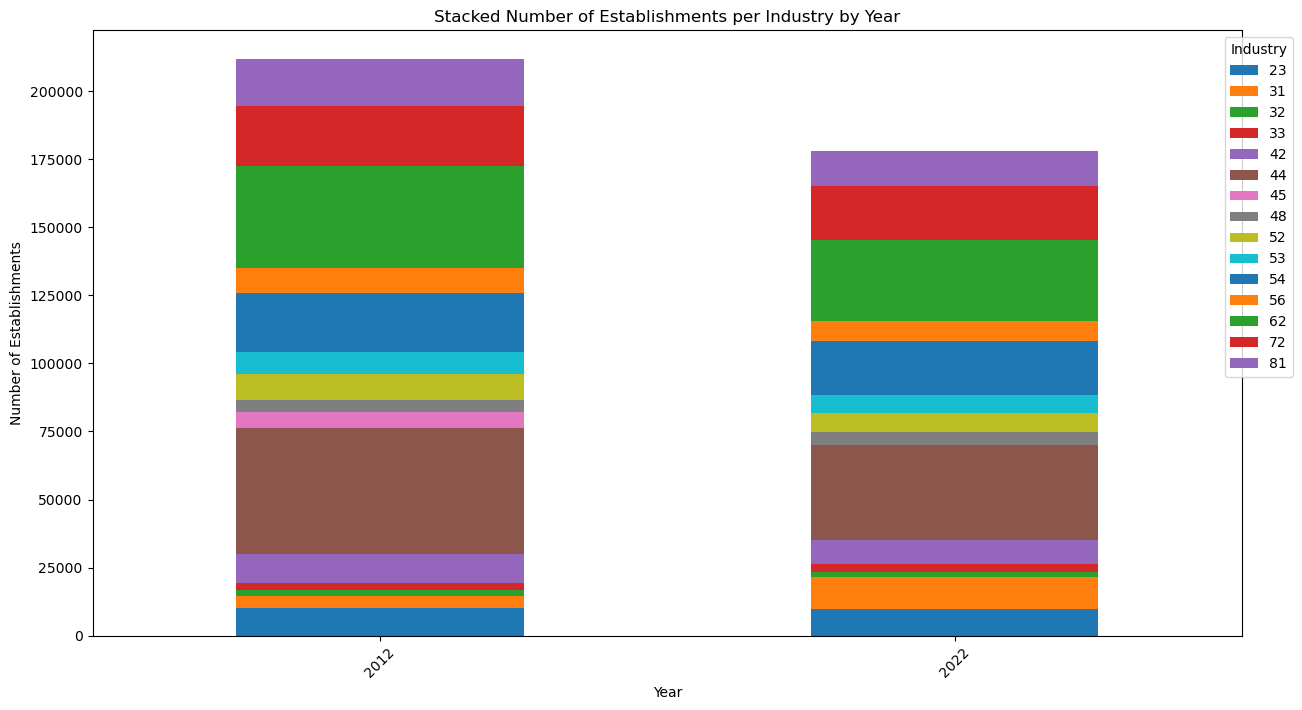

In [13]:
#creating a stacked bar chart to represent number of establishments per industry per year just for 2012 and 2022

#made a pivot table

df_filtered = df12_22[df12_22['year'].isin([2012, 2022])]
pivot_df = df_filtered.pivot_table(index='year', columns='naics', values='establishments', aggfunc = "sum")

# Plotting directly from the pivot_table DataFrame
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True, width=0.5)  # The index of pivot_df (Year) is used for the x-axis

plt.title('Stacked Number of Establishments per Industry by Year')
plt.xlabel('Year')  # This is technically redundant if 'Year' is clearly labeled from the DataFrame's index
plt.ylabel('Number of Establishments')
plt.legend(title='Industry')
plt.xticks(rotation=45)  # Improve label readability

plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper right')
plt.tight_layout(rect=[0, 0, 2, 1.5]) 
plt.savefig('stacked_bar1.png')

plt.show()

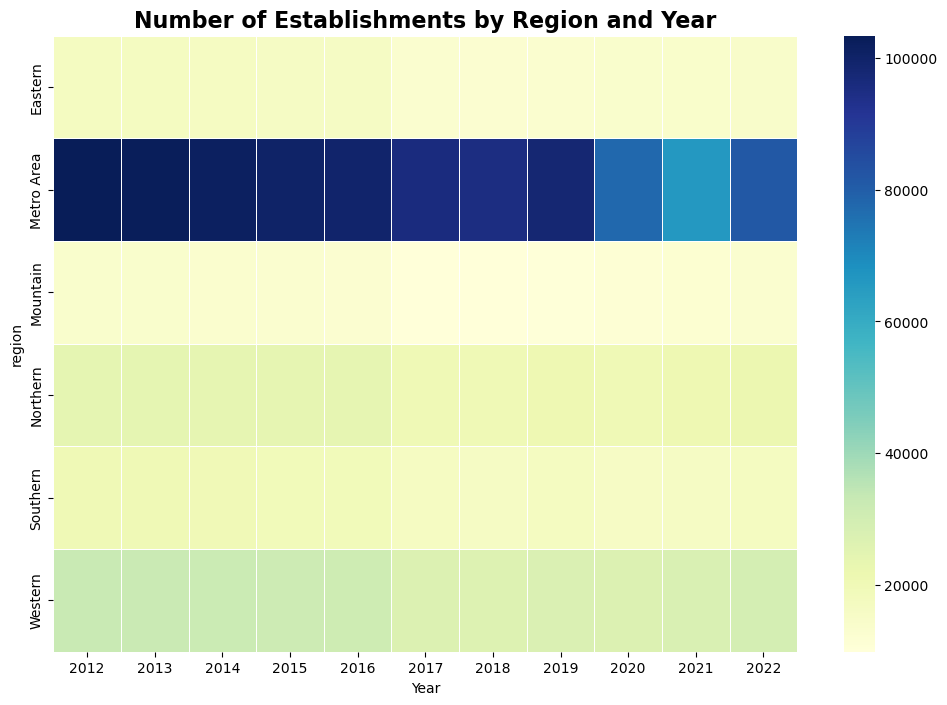

In [40]:
# this is our pivot table to make the df work on a heat map

pivot_table_df = df12_22.pivot_table(index='region', 
                                     columns='year', 
                                     values='establishments', 
                                     aggfunc='sum') 

# this is the code to create a heatmap for our establishments by region
plt.figure(figsize=(12, 8)) 
sns.heatmap(pivot_table_df, annot=False, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Number of Establishments by Region and Year',fontweight='bold',fontsize=16)
plt.ylabel('region')
plt.xlabel('Year')
plt.show()

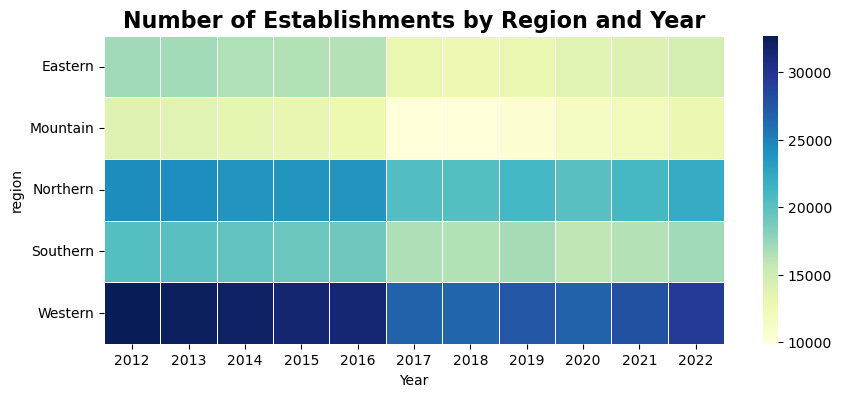

In [39]:
# this is our pivot table to make the df work on a heat map without the metro area

df_filtered1 = df12_22[df12_22['region'] != 'Metro Area']
pivot_table_df = df_filtered1.pivot_table(index='region', 
                                     columns='year', 
                                     values='establishments', 
                                     aggfunc='sum') 

# this is the code to create a heatmap for our establishments by region
plt.figure(figsize=(10, 4)) 
sns.heatmap(pivot_table_df, annot=False, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Number of Establishments by Region and Year',fontweight='bold',fontsize=16)
plt.ylabel('region')
plt.xlabel('Year')
plt.show()

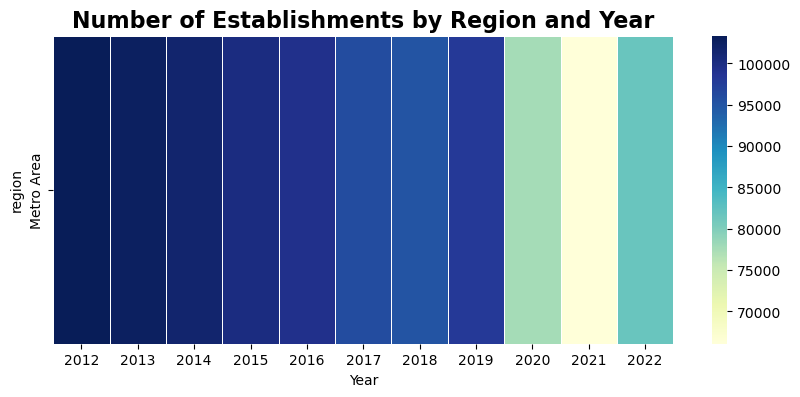

In [42]:
# this is our pivot table to make the df work on a heat map of just metro area

df_filtered1 = df12_22[df12_22['region'].isin(['Metro Area'])]
pivot_table_df = df_filtered1.pivot_table(index='region', 
                                     columns='year', 
                                     values='establishments', 
                                     aggfunc='sum') 

# this is the code to create a heatmap for our establishments by region
plt.figure(figsize=(10, 4)) 
sns.heatmap(pivot_table_df, annot=False, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Number of Establishments by Region and Year',fontweight='bold',fontsize=16)
plt.ylabel('region')
plt.xlabel('Year')
plt.show()

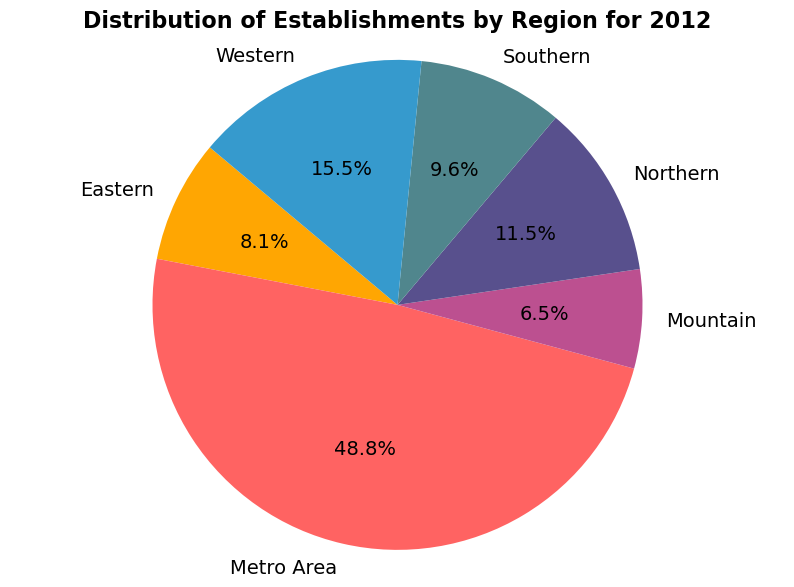

In [36]:
#this is a pie chart of the distribution of establishments per region for 2012

year_data = df12_22[df12_22['year'] == 2012]

region_data = year_data.groupby('region')['establishments'].sum().reset_index()

# Data for pie chart
labels = region_data['region']
sizes = region_data['establishments']
colors = plt.cm.Paired(range(len(labels)))  # Optional: Assign colors to each region

# Create pie chart
plt.figure(figsize=(10, 7))  # Adjust figure size as needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%',textprops={'fontsize': 14}, startangle=140, colors=['#ffa602','#ff6362','#bc5090','#58508d','#50868d','#369acd'])
plt.title('Distribution of Establishments by Region for 2012',fontweight='bold',fontsize=16)
plt.axis('equal')  # Ensures that pie is drawn as a circle.

plt.show()

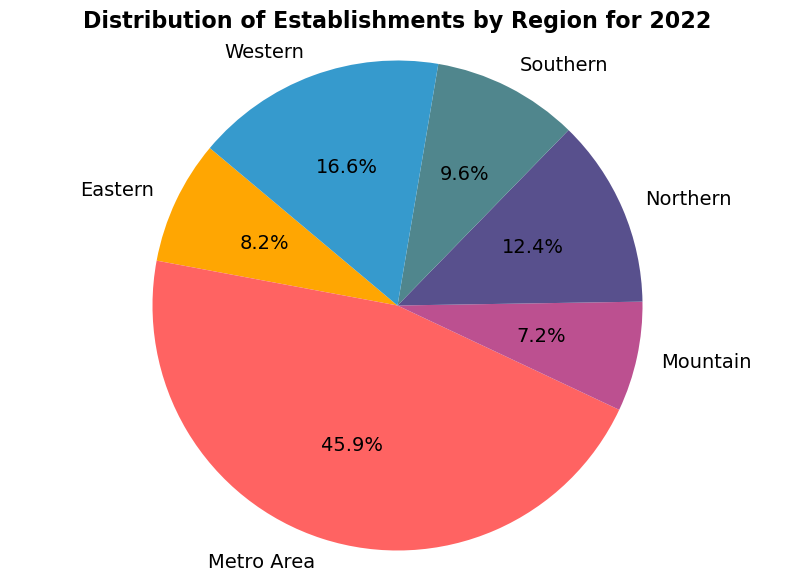

In [35]:
#this is a pie chart of the distribution of establishments per region for 2022

year_data = df12_22[df12_22['year'] == 2022]

region_data = year_data.groupby('region')['establishments'].sum().reset_index()

# Data for pie chart
labels = region_data['region']
sizes = region_data['establishments']
colors = plt.cm.Paired(range(len(labels)))  # Optional: Assign colors to each region

# Create pie chart
plt.figure(figsize=(10, 7))  # Adjust figure size as needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%',textprops={'fontsize': 14}, startangle=140, colors=['#ffa602','#ff6362','#bc5090','#58508d','#50868d','#369acd'])
plt.title('Distribution of Establishments by Region for 2022',fontweight='bold',fontsize=16)
plt.axis('equal')  # Ensures that pie is drawn as a circle.

plt.show()
